# Computational Techniques for Data Science
## Module 3
## Stephen Korir
## 193218

## Question 1

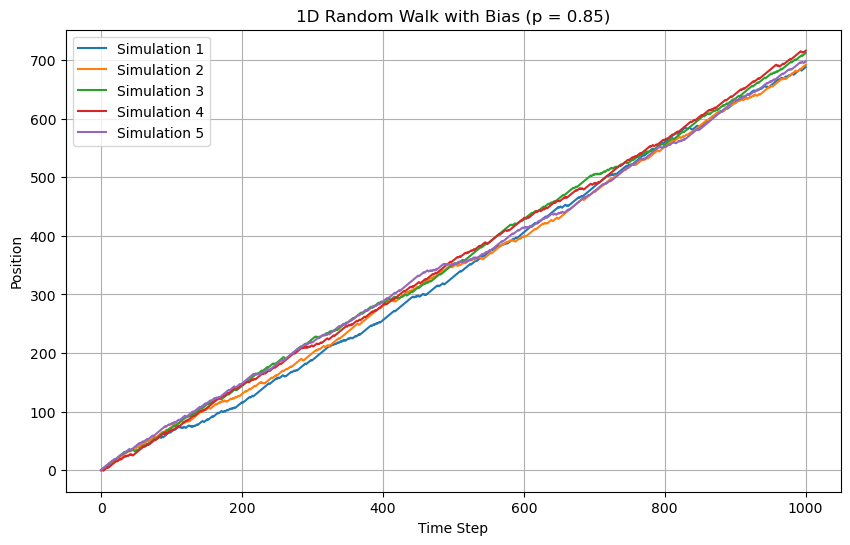

Final positions after 1000 steps: [688, 692, 712, 716, 698]
Mean final position: 701.20
Standard deviation of final positions: 11.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 1000 
p = 0.85          
num_simulations = 5 

# Function to simulate a single random walk
def random_walk(steps, p):
    position = 0
    positions = [position]
    for _ in range(steps):
        step = np.random.choice([-1, 1], p=[1 - p, p]) 
        position += step
        positions.append(position)
    return positions

# Run multiple simulations and store results
all_walks = [random_walk(num_steps, p) for _ in range(num_simulations)]

# Plot all random walks
plt.figure(figsize=(10, 6))
for i, walk in enumerate(all_walks):
    plt.plot(walk, label=f"Simulation {i+1}")
plt.title("1D Random Walk with Bias (p = 0.85)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.grid(True)
plt.legend()
plt.show()

# Calculate final positions, mean, and standard deviation
final_positions = [walk[-1] for walk in all_walks]
mean_final_position = np.mean(final_positions)
std_final_position = np.std(final_positions)

# Print results
print("Final positions after 1000 steps:", final_positions)
print(f"Mean final position: {mean_final_position:.2f}")
print(f"Standard deviation of final positions: {std_final_position:.2f}")

### Interpretation
- The particle tends to move to right up left after 1000 steps  and clustered around 700 = [688, 692, 712, 716, 698]
- Expected Displacement -> [steps X (2p-1) = 1000 X (2 X 0.85 -1) = 700]
- The mean of the final position is close to 700 at 701.20
- The standard deviation is 11 which is fairly a small value and shows consistency in the results. 



## Question 2

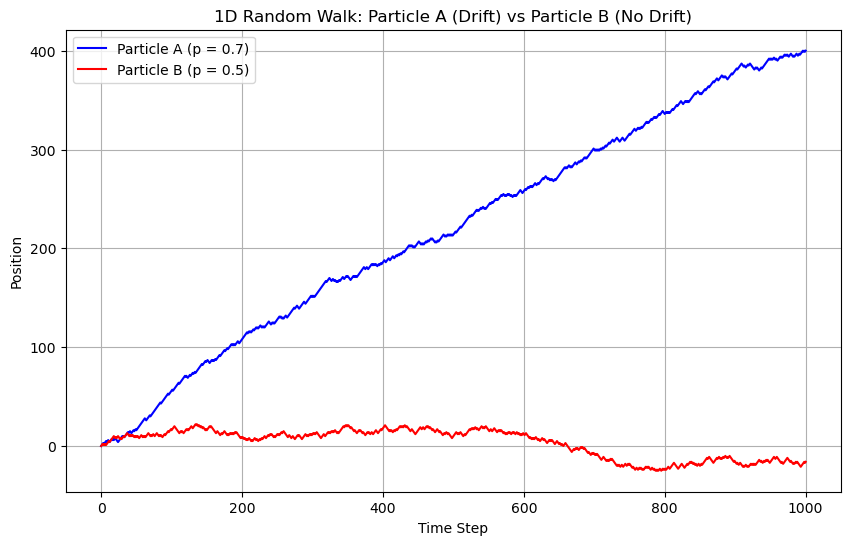

Final position of Particle A: 400
Final position of Particle B: -16


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 1000  
p_A = 0.7        
p_B = 0.5       

# Function to simulate a single random walk
def random_walk(steps, p):
    position = 0
    positions = [position]
    for _ in range(steps):
        step = np.random.choice([-1, 1], p=[1 - p, p])  
        position += step
        positions.append(position)
    return positions

# Simulate random walks for both particles
walk_A = random_walk(num_steps, p_A)
walk_B = random_walk(num_steps, p_B)

# Plot both random walks
plt.figure(figsize=(10, 6))
plt.plot(walk_A, color='blue', label="Particle A (p = 0.7)")
plt.plot(walk_B, color='red', label="Particle B (p = 0.5)")
plt.title("1D Random Walk: Particle A (Drift) vs Particle B (No Drift)")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.grid(True)
plt.legend()
plt.show()

# Calculate final positions, mean, and standard deviation
final_position_A = walk_A[-1]
final_position_B = walk_B[-1]

# Print results
print(f"Final position of Particle A: {final_position_A}")
print(f"Final position of Particle B: {final_position_B}")

In [ ]:
# Parameters
num_simulations = 100 

# Simulate multiple random walks for both particles
final_positions_A = [random_walk(num_steps, p_A)[-1] for _ in range(num_simulations)]
final_positions_B = [random_walk(num_steps, p_B)[-1] for _ in range(num_simulations)]

# Calculate mean and standard deviation
mean_A = np.mean(final_positions_A)
std_A = np.std(final_positions_A)
mean_B = np.mean(final_positions_B)
std_B = np.std(final_positions_B)

# Print results
print(f"Particle A: Mean final position = {mean_A:.2f}, Std = {std_A:.2f}")
print(f"Particle B: Mean final position = {mean_B:.2f}, Std = {std_B:.2f}")

Particle A: Mean final position = 397.16, Std = 25.51
Particle B: Mean final position = -0.40, Std = 30.89


### Interpretation
- With a probability = 0.7, the particle A has a strong tendency to move to the right.
- The expected displacement after 1000 steps is 400.[steps×(2p−1)=1000×(2×0.7−1)=400]
- For particle B, with a p =0.5, the particle has no tendency to move in either direction. 
- The expected dispalcement is 0. And from the graph Particle B is close to 0(-16) after 1000 steps.[steps×(2p−1)=1000×(2×0.5−1)=0]
- For particle A, after 100 simulations the mean at the final position is at 397.16 which is very close to 400 and also the mean at final position for particle B is at -0.40 which is also very close to 0.
- Stabdard deviations for both Particle A and B is 25 and 30 which is close to square root of 1000 steps.

## Question 3

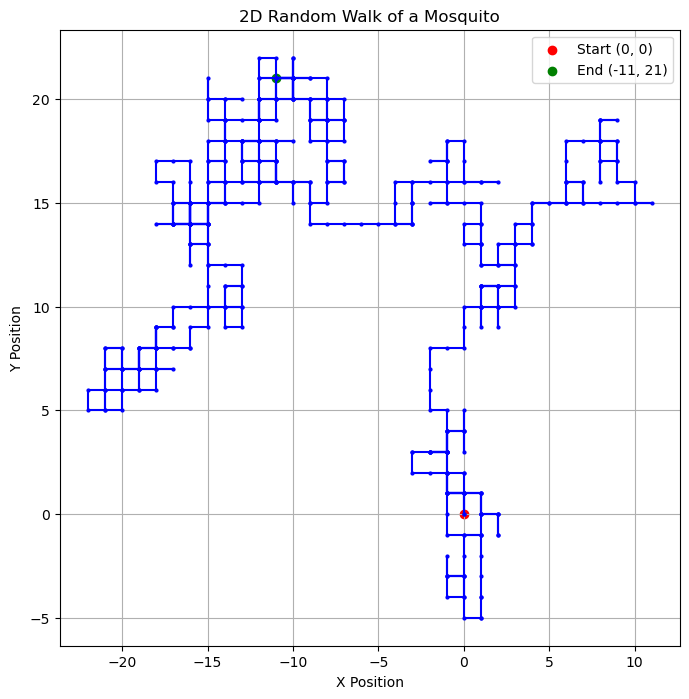

Final position after 500 steps: (-11, 21)
Distance from origin: 23.71

After 10 simulations:
Average distance from origin: 18.28
Standard deviation of distance: 13.83


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 500 
num_simulations = 10 

# Function to simulate a 2D random walk
def random_walk_2d(steps):
    x, y = 0, 0  
    x_positions, y_positions = [x], [y]
    
    for _ in range(steps):
        direction = np.random.choice(["up", "down", "left", "right"])  
        if direction == "up":
            y += 1
        elif direction == "down":
            y -= 1
        elif direction == "left":
            x -= 1
        elif direction == "right":
            x += 1
        
        x_positions.append(x)
        y_positions.append(y)
    
    return x_positions, y_positions, (x, y)

# Function to calculate distance from origin
def distance_from_origin(x, y):
    return np.sqrt(x**2 + y**2)

# Simulate one random walk and plot the path
x_positions, y_positions, final_position = random_walk_2d(num_steps)
distance = distance_from_origin(*final_position)

# Plot the path
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, marker='o', markersize=2, linestyle='-', color='b')
plt.scatter(0, 0, color='red', label="Start (0, 0)") 
plt.scatter(final_position[0], final_position[1], color='green', label=f"End {final_position}")
plt.title("2D Random Walk of a Mosquito")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.legend()
plt.show()

# Print results for one simulation
print(f"Final position after {num_steps} steps: {final_position}")
print(f"Distance from origin: {distance:.2f}")

# Run 10 simulations and calculate average distance and standard deviation
distances = []
for _ in range(num_simulations):
    _, _, final_position = random_walk_2d(num_steps)
    distance = distance_from_origin(*final_position)
    distances.append(distance)

average_distance = np.mean(distances)
std_distance = np.std(distances)

# Print results for 10 simulations
print(f"\nAfter {num_simulations} simulations:")
print(f"Average distance from origin: {average_distance:.2f}")
print(f"Standard deviation of distance: {std_distance:.2f}")

### Interpretation
- After 500 steps, the Mosquito ends up at (-11,21)
- The final position  varies bwtween simulations due to the randomness of the walk
- The expected distance from the origin after n steps is equal to the squareroot of th number of steps which is approx = 23.71
- The average distance from the origin is 18.28 and the standard deviation is 13.83
- The mosquito wanders away from the origin as the distance grows with the path being unpredictable but the statistical properties foloow theoritical predictions. 

## Question 4

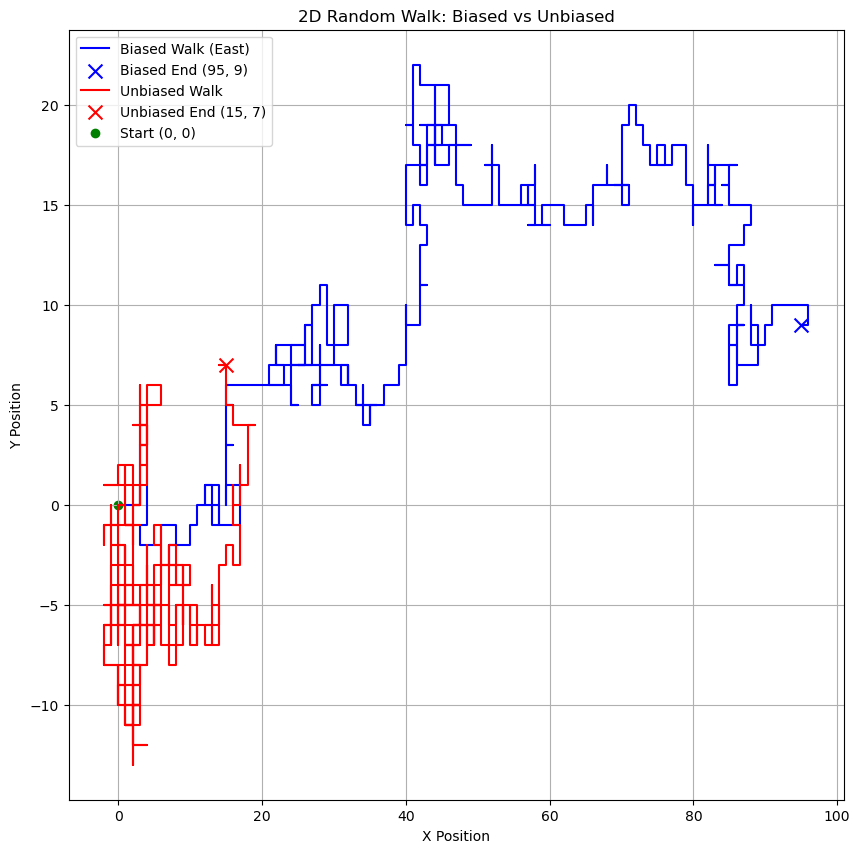

Biased Walk: Final position = (95, 9), Distance from origin = 95.43
Unbiased Walk: Final position = (15, 7), Distance from origin = 16.55

After 10 simulations:
Biased Walk: Average distance = 95.61, Std = 16.75
Unbiased Walk: Average distance = 16.15, Std = 8.09


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 500 
num_simulations = 10 

# Probabilities for biased walk
prob_biased = {
    "East": 0.4,
    "West": 0.2,
    "North": 0.2,
    "South": 0.2
}

# Probabilities for unbiased walk
prob_unbiased = {
    "East": 0.25,
    "West": 0.25,
    "North": 0.25,
    "South": 0.25
}

# Function to simulate a 2D random walk
def random_walk_2d(steps, probabilities):
    x, y = 0, 0  # Start at origin (0, 0)
    x_positions, y_positions = [x], [y]
    
    directions = list(probabilities.keys())
    probs = list(probabilities.values())
    
    for _ in range(steps):
        direction = np.random.choice(directions, p=probs) 
        if direction == "East":
            x += 1
        elif direction == "West":
            x -= 1
        elif direction == "North":
            y += 1
        elif direction == "South":
            y -= 1
        
        x_positions.append(x)
        y_positions.append(y)
    
    return x_positions, y_positions, (x, y)

# Function to calculate distance from origin
def distance_from_origin(x, y):
    return np.sqrt(x**2 + y**2)

# Simulate one biased and one unbiased random walk
x_biased, y_biased, final_biased = random_walk_2d(num_steps, prob_biased)
x_unbiased, y_unbiased, final_unbiased = random_walk_2d(num_steps, prob_unbiased)

# Plot both paths
plt.figure(figsize=(10, 10))
plt.plot(x_biased, y_biased, color='blue', label="Biased Walk (East)")
plt.scatter(final_biased[0], final_biased[1], color='blue', marker='x', s=100, label=f"Biased End {final_biased}")
plt.plot(x_unbiased, y_unbiased, color='red', label="Unbiased Walk")
plt.scatter(final_unbiased[0], final_unbiased[1], color='red', marker='x', s=100, label=f"Unbiased End {final_unbiased}")
plt.scatter(0, 0, color='green', label="Start (0, 0)")  
plt.title("2D Random Walk: Biased vs Unbiased")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.legend()
plt.show()

# Print results for one simulation
distance_biased = distance_from_origin(*final_biased)
distance_unbiased = distance_from_origin(*final_unbiased)
print(f"Biased Walk: Final position = {final_biased}, Distance from origin = {distance_biased:.2f}")
print(f"Unbiased Walk: Final position = {final_unbiased}, Distance from origin = {distance_unbiased:.2f}")

# Run 10 simulations and calculate average distance and standard deviation
distances_biased, distances_unbiased = [], []
for _ in range(num_simulations):
    _, _, final_biased = random_walk_2d(num_steps, prob_biased)
    _, _, final_unbiased = random_walk_2d(num_steps, prob_unbiased)
    distances_biased.append(distance_from_origin(*final_biased))
    distances_unbiased.append(distance_from_origin(*final_unbiased))

average_distance_biased = np.mean(distances_biased)
std_distance_biased = np.std(distances_biased)
average_distance_unbiased = np.mean(distances_unbiased)
std_distance_unbiased = np.std(distances_unbiased)

# Print results for 10 simulations
print(f"\nAfter {num_simulations} simulations:")
print(f"Biased Walk: Average distance = {average_distance_biased:.2f}, Std = {std_distance_biased:.2f}")
print(f"Unbiased Walk: Average distance = {average_distance_unbiased:.2f}, Std = {std_distance_unbiased:.2f}")

### Interpretation
- The biased walk drifts to the east since it has a 40% probability of moving Eastwards and 20% probability of moving Westwards. Thgis bias with time would cause the drift after a number of steps
- The biased walk will have a larger average distance from the origin because of the drift and so is the standard deviation, as seen from the results above. Avg Distance of 95.61 against 16.15 for unbiased and std of 15.23 against 5.67 for unbiased walk.
- A perfect world phenomenon would be Animal Migration, for example elephants as they drift where there is food forage and water resources. 